<a href="https://colab.research.google.com/github/falloatti/HenryProyectoUno/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#habilito lectura en Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pandas_profiling import ProfileReport
from datetime import datetime, timedelta
from sklearn import metrics
import math
from sklearn.metrics import classification_report
from sklearn import linear_model
import pickle as pkl

In [ ]:
pd.options.display.float_format = '{:.2f}'.format


In [ ]:
movies = pd.read_parquet(r'/content/drive/MyDrive/ProyectosHenry/archivo.parquet')


In [ ]:
movies.shape

(11013823, 17)

In [ ]:
movies.head()

,userId,score,timestamp,id,type,title,director,cast,country,date_added,year,rating,listed_in,platform,duration_int,duration_type,scored
0,1,1.00,2015-03-09,as680,tv show,the english civil war,None,robert whelan,None,NaT,2019,13+,"documentary, special interest",amazon,1,season,3.55
1,583,4.50,2005-04-08,as680,tv show,the english civil war,None,robert whelan,None,NaT,2019,13+,"documentary, special interest",amazon,1,season,3.55
2,765,5.00,1998-03-12,as680,tv show,the english civil war,None,robert whelan,None,NaT,2019,13+,"documentary, special interest",amazon,1,season,3.55
3,2116,3.00,1996-07-01,as680,tv show,the english civil war,None,robert whelan,None,NaT,2019,13+,"documentary, special interest",amazon,1,season,3.55
4,2143,3.00,2015-06-23,as680,tv show,the english civil war,None,robert whelan,None,NaT,2019,13+,"documentary, special interest",amazon,1,season,3.55


In [ ]:
movies.describe()

,userId,score,year,duration_int,scored
count,11013823.00,11013823.00,11013823.00,11013823.00,11013823.00
mean,89970.60,3.53,2010.82,66.60,3.53
std,86863.89,1.06,15.39,51.42,0.05
min,1.00,0.50,1920.00,0.00,3.34
25%,28557.00,3.00,2010.00,3.00,3.50
50%,56845.00,3.50,2016.00,84.00,3.53
75%,116864.00,4.00,2019.00,101.00,3.57
max,270896.00,5.00,2021.00,601.00,3.72


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11013823 entries, 0 to 11024288
Data columns (total 17 columns):
 #   Column         Dtype         
---  ------         -----         
 0   userId         int64         
 1   score          float64       
 2   timestamp      datetime64[ns]
 3   id             object        
 4   type           object        
 5   title          object        
 6   director       object        
 7   cast           object        
 8   country        object        
 9   date_added     datetime64[ns]
 10  year           int64         
 11  rating         object        
 12  listed_in      object        
 13  platform       object        
 14  duration_int   int64         
 15  duration_type  object        
 16  scored         float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(10)
memory usage: 1.5+ GB


**Revisar valores no nulos por columna**

In [ ]:
print("Cantidad de filas: ", movies.shape[0])
for column in movies.columns:
    print(column, movies[column].dtype, "Valores no nulos: ", movies[column].count())

Cantidad de filas:  11013823
userId int64 Valores no nulos:  11013823
score float64 Valores no nulos:  11013823
timestamp datetime64[ns] Valores no nulos:  11013823
id object Valores no nulos:  11013823
type object Valores no nulos:  11013823
title object Valores no nulos:  11013823
director object Valores no nulos:  7056968
cast object Valores no nulos:  8465400
country object Valores no nulos:  5509022
date_added datetime64[ns] Valores no nulos:  6440690
year int64 Valores no nulos:  11013823
rating object Valores no nulos:  11013823
listed_in object Valores no nulos:  11013823
platform object Valores no nulos:  11013823
duration_int int64 Valores no nulos:  11013823
duration_type object Valores no nulos:  10924436
scored float64 Valores no nulos:  11013823


**chequeo duplicados**

In [ ]:
# los duplicados fueron eliminados en el ETL, chequeamos
num_duplicados = movies.duplicated().sum()

# imprimir el número de valores duplicados
print("El número de valores duplicados en el dataset es:", num_duplicados)

El número de valores duplicados en el dataset es: 0


**variables iniciales**

In [ ]:
movies.columns

Index(['userId', 'score', 'timestamp', 'id', 'type', 'title', 'director',
       'cast', 'country', 'date_added', 'year', 'rating', 'listed_in',
       'platform', 'duration_int', 'duration_type', 'scored'],
      dtype='object')

In [ ]:
unique_values = movies['userId'].nunique()
print("La columna 'userId' tiene", unique_values, "valores únicos.")

La columna 'userId' tiene 115077 valores únicos.


In [ ]:
counts = movies['userId'].value_counts()
cumulative_counts = counts.cumsum()
cumulative_percents = cumulative_counts / len(movies)
pareto_df = pd.DataFrame({'userId': counts.index, 'count': counts, 'cumulative_percent': cumulative_percents})
pareto_df = pareto_df.sort_values(by='cumulative_percent', ascending=False)
total_percent = 100 * cumulative_counts / len(movies)
pareto_df['total_percent'] = total_percent
print(pareto_df)

        userId  count  cumulative_percent  total_percent
17774    17774      1                1.00         100.00
44302    44302      1                1.00         100.00
22271    22271      1                1.00         100.00
113012  113012      1                1.00         100.00
12252    12252      1                1.00         100.00
...        ...    ...                 ...            ...
24025    24025   4861                0.00           0.41
70648    70648   5337                0.00           0.36
270123  270123   7500                0.00           0.32
8659      8659   9252                0.00           0.25
45811    45811  18044                0.00           0.16

[115077 rows x 4 columns]


In [ ]:
filtered_df = pareto_df[pareto_df['cumulative_percent'] <= 0.80]
unique_values = len(filtered_df)
print(unique_values)

30549


In [ ]:
for percent in range(70, 81):
    percent /= 100
    filtered_df = pareto_df[pareto_df['cumulative_percent'] <= percent]
    unique_values = len(filtered_df)
    percent_of_unique = 100 * unique_values / len(pareto_df['userId'].unique())
    print(f"Con {percent*100}% del porcentaje acumulado de 'userId', se tienen {unique_values} valores únicos que representan el {percent_of_unique:.2f}% de todos los valores únicos.")


Con 70.0% del porcentaje acumulado de 'userId', se tienen 20295 valores únicos que representan el 17.64% de todos los valores únicos.
Con 71.0% del porcentaje acumulado de 'userId', se tienen 21127 valores únicos que representan el 18.36% de todos los valores únicos.
Con 72.0% del porcentaje acumulado de 'userId', se tienen 21996 valores únicos que representan el 19.11% de todos los valores únicos.
Con 73.0% del porcentaje acumulado de 'userId', se tienen 22904 valores únicos que representan el 19.90% de todos los valores únicos.
Con 74.0% del porcentaje acumulado de 'userId', se tienen 23853 valores únicos que representan el 20.73% de todos los valores únicos.
Con 75.0% del porcentaje acumulado de 'userId', se tienen 24846 valores únicos que representan el 21.59% de todos los valores únicos.
Con 76.0% del porcentaje acumulado de 'userId', se tienen 25882 valores únicos que representan el 22.49% de todos los valores únicos.
Con 77.0% del porcentaje acumulado de 'userId', se tienen 2696

**Comentarios:** la base cuenta con 115077 usuarios totales. Del total de filas, el 26.55% de los usuarios representa el 80% de las calificaciones de la base. 

**VARIABLE 'score'** corresponde a la calificacion dada por los usuarios. El rango es desde 1 a 5 en intervalos de 0,5. La puntuacion media es de 3.53 y mediana de 3.5

In [ ]:
movies.score.describe()

count   11013823.00
mean           3.53
std            1.06
min            0.50
25%            3.00
50%            3.50
75%            4.00
max            5.00
Name: score, dtype: float64

In [ ]:
valores_unicos = movies["score"].unique()
print(valores_unicos)

[1.  4.5 5.  3.  4.  2.  3.5 2.5 0.5 1.5]


In [ ]:
tabla_valores_unicos = movies["score"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(movies) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos)

   valor  cantidad porcentaje
0   4.00   2968261     26.95%
1   3.00   2231080     20.26%
2   5.00   1615290     14.67%
3   3.50   1328630     12.06%
4   4.50    919070      8.34%
5   2.00    739522      6.71%
6   2.50    530228      4.81%
7   1.00    350378      3.18%
8   1.50    167371      1.52%
9   0.50    163993      1.49%


In [ ]:
%matplotlib inline

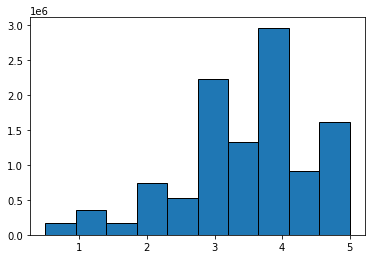

In [ ]:
plt.hist(movies['score'], edgecolor = 'black', linewidth = 1)
plt.show()

**comentarios:** es una variable categorica ordinal, mientras mas alta la puntuacion mejor valoracion. 

**VARIABLE 'timestamp'** corresponde a la fecha de la calificacion

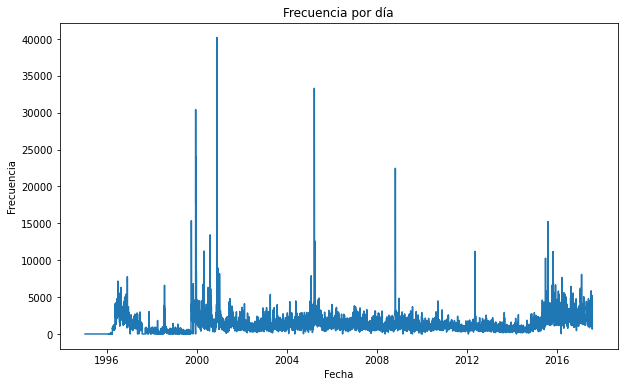

In [ ]:
import matplotlib.pyplot as plt

# Configuramos la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Agrupamos los datos por día usando resample()
frecuencia = movies.resample('D', on='timestamp').count()

# Graficamos los resultados
ax.plot(frecuencia.index, frecuencia['score'])

# Configuramos las etiquetas del eje x y el título del gráfico
ax.set_xlabel('Fecha')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia por día')

# Mostramos el gráfico
plt.show()

**comentarios**: no hay valores nulos

**VARIABLE 'id'** corresponde al id de la pelicula

In [ ]:
unique_values = movies['id'].nunique()
print("La columna 'id' tiene", unique_values, "valores únicos.")

La columna 'id' tiene 22998 valores únicos.


**VARIABLE 'type'** corresponde al tipo de programa (TV show o movie)

In [ ]:
valores_unicos = movies["type"].unique()
print(valores_unicos)

['tv show' 'movie']


In [ ]:
tabla_valores_unicos = movies["type"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(movies) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos)

     valor  cantidad porcentaje
0    movie   7889721     71.63%
1  tv show   3124102     28.37%


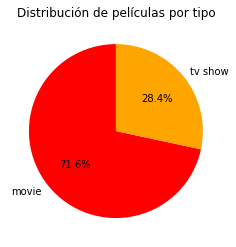

In [ ]:
# Crear una lista de colores para cada sección del gráfico
colores = ['red', 'orange']

# Crear un gráfico circular
plt.pie(tabla_valores_unicos['cantidad'], labels=tabla_valores_unicos['valor'], 
        colors=colores, autopct='%1.1f%%', startangle=90)

# Agregar título al gráfico
plt.title('Distribución de películas por tipo')

# Mostrar el gráfico
plt.show()

**comentarios**: el 71.63% corresponde a movies y el 28.37% corresponde a tv show. Se genera variable dummies con cada una. 

In [ ]:
dummies = pd.get_dummies(movies["type"])


In [ ]:
movies = pd.concat([movies, dummies], axis=1)


In [ ]:
movies.head(2)

,userId,score,timestamp,id,type,title,director,cast,country,date_added,year,rating,listed_in,platform,duration_int,duration_type,scored,movie,tv show
0,1,1.00,2015-03-09,as680,tv show,the english civil war,None,robert whelan,None,NaT,2019,13+,"documentary, special interest",amazon,1,season,3.55,0,1
1,583,4.50,2005-04-08,as680,tv show,the english civil war,None,robert whelan,None,NaT,2019,13+,"documentary, special interest",amazon,1,season,3.55,0,1


In [ ]:
movies.drop('type', axis= 'columns', inplace= True)

In [ ]:
movies.head(2)

,userId,score,timestamp,id,title,director,cast,country,date_added,year,rating,listed_in,platform,duration_int,duration_type,scored,movie,tv show
0,1,1.00,2015-03-09,as680,the english civil war,None,robert whelan,None,NaT,2019,13+,"documentary, special interest",amazon,1,season,3.55,0,1
1,583,4.50,2005-04-08,as680,the english civil war,None,robert whelan,None,NaT,2019,13+,"documentary, special interest",amazon,1,season,3.55,0,1


**VARIABLE 'title'** corresponde al titulo de la pelicula o tv show. No hay valores nulos. Se podria realizar algun procesamiento de lenguaje sobre el texo como con la descripcion (ya eliminado) pero se quita del alcance del proyecto esa opcion. Se mantiene la variable para alguna consulta que necesite devolver el valor. 

In [ ]:
unique_values = movies['title'].nunique()
print("La columna 'title' tiene", unique_values, "valores únicos.")

La columna 'title' tiene 22042 valores únicos.


**comentarios**: los valores unicos del titulo es menor a la cantidad de unicos de id. Esto es porque hay peliculas que tienen una remake o mismo nombre. **Ver que hacemos**

**VARIABLE 'director'** corresponde al director de la pelicula. Valores no nulos:  7056968


In [ ]:
# Verificamos si hay más de un valor en cada celda de la columna "values"
movies["multiple_values"] = (movies["director"].str.count(",") >= 1).astype(int)


In [ ]:
movies.sample(1)

,userId,score,timestamp,id,title,director,cast,country,date_added,year,rating,listed_in,platform,duration_int,duration_type,scored,movie,tv show,multiple_values
4173399,63446,1.00,1999-12-14,ns7829,ramayan,None,"gagan malik, neha sargam, neil bhatt",india,2018-04-01,2012,tv-14,"international tv shows, tv dramas",netflix,1,season,3.54,0,1,0


In [ ]:
unique_values = movies['multiple_values'].nunique()
print("La columna 'multiple_values' tiene", unique_values, "valores únicos.")

La columna 'multiple_values' tiene 2 valores únicos.


In [ ]:
valores_unicos = movies["multiple_values"].unique()
print(valores_unicos)

[0 1]


In [ ]:
tabla_valores_unicos = movies["multiple_values"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(movies) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos)

   valor  cantidad porcentaje
0      0  10418568      94.6%
1      1    595255       5.4%


In [ ]:
tabla_valores_unicos = movies["director"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(movies) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos.head(5))

                   valor  cantidad porcentaje
0            mark knight     54424      0.49%
1          cannis holder     29440      0.27%
2            jay chapman     21928       0.2%
3  moonbug entertainment     17715      0.16%
4     arthur van merwijk     14196      0.13%


In [ ]:
# Generar una lista de valores de la columna "valor"
lista_valores = tabla_valores_unicos['valor'].tolist()
print(lista_valores)

['mark knight', 'cannis holder', 'jay chapman', 'moonbug entertainment', 'arthur van merwijk', 'manny rodriguez', 'jay karas', 'john english', 'rajiv chilaka', 'raúl campos, jan suter', 'marcus raboy', 'brian volk-weiss', 'jack hannah', '1', 'paul hoen', 'john lasseter', 'suhas kadav', 'robert stevenson', 'baeble music', 'robert vince', 'ryan polito', 'steven spielberg', 'joseph kane', 'cathy garcia-molina', 'youssef chahine', 'michael j. nelson', 'george archainbaud', 'martin scorsese', 'john asher', 'charles nichols', 'don michael paul', 'lance bangs', 'david dhawan', 'william nigh', 'shawn levy', 'aaron michael', 'pinkfong', 'ron howard', 'vincent mceveety', 'kenny ortega', 'tim gray', 'robert rodriguez', 'rob reiner', 'bob peterson', 'mora tv', 'fernando ayllón', 'bruce legg', 'johnnie to', 'sean mcnamara', 'norman tokar', 'christian hughes', 'doug campbell', 'percy adlon', 'james algar', 'william hoareau', 'spike lee', 'ram gopal varma', 'robert luketic', 'frank mcdonald', 'willia

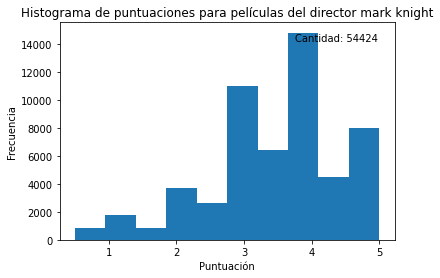

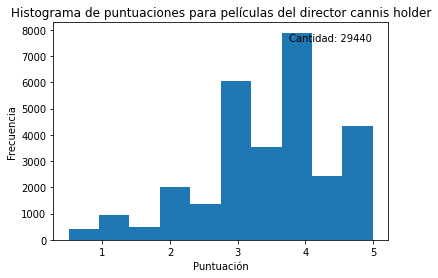

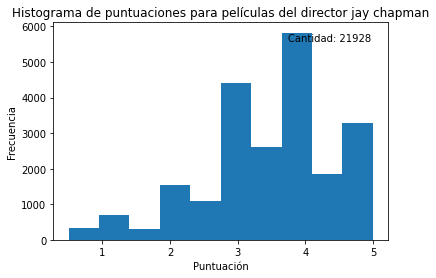

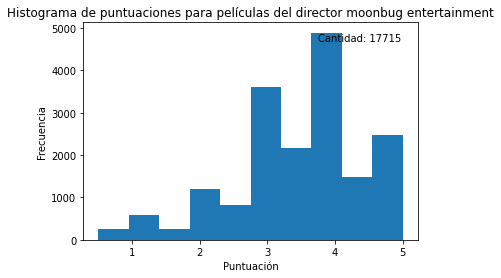

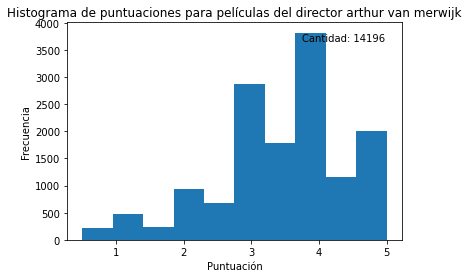

In [ ]:

# Definir la lista de directores deseados
directores_dados = ['mark knight', 'cannis holder', 'jay chapman', 'moonbug entertainment', 'arthur van merwijk' ]


# Crear un histograma separado para cada director en la lista
for director in directores_dados:
    # Filtrar los datos de "score" para el director actual
    scores_director_actual = movies.loc[movies["director"] == director, "score"]
    
    # Crear un nuevo gráfico para el director actual
    plt.figure()
    
    # Crear el histograma para el director actual
    plt.hist(scores_director_actual)
    
    # Añadir etiquetas al gráfico para el director actual
    plt.title("Histograma de puntuaciones para películas del director {}".format(director))
    plt.xlabel("Puntuación")
    plt.ylabel("Frecuencia")
    
    # Agregar el valor de cantidad correspondiente al director actual
    cantidad_actual = len(scores_director_actual)
    plt.text(0.95, 0.95, "Cantidad: {}".format(cantidad_actual), 
             transform=plt.gca().transAxes, horizontalalignment='right', verticalalignment='top')
    
    # Mostrar el gráfico para el director actual
    plt.show()

In [ ]:
movies['mark knight'] = np.where(movies['director'] == 'mark knight', 1, 0)
movies['cannis holder'] = np.where(movies['director'] == 'cannis holder', 1, 0)
movies['jay chapman'] = np.where(movies['director'] == 'jay chapman', 1, 0)
movies['moonbug entertainment'] = np.where(movies['director'] == 'moonbug entertainment', 1, 0)
movies['arthur van merwijk'] = np.where(movies['director'] == 'arthur van merwijk', 1, 0)

In [ ]:
#controlo algunos casos para ver si coincide 
tabla_valores_unicos = movies["mark knight"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(movies) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos)

   valor  cantidad porcentaje
0      0  10959399     99.51%
1      1     54424      0.49%


**comentarios** de decidio crear variables nuevas con el top 5 de directores que recibieron calificacion y se elimina la original. Esto es por el supuesto si hay algun usuario que puede tener preferencia por alguno. 

In [ ]:
movies.drop('director', axis= 'columns', inplace= True)

In [ ]:
movies.shape

(11013823, 23)

In [ ]:
movies.head(1)

,userId,score,timestamp,id,title,cast,country,date_added,year,rating,...,duration_type,scored,movie,tv show,multiple_values,mark knight,cannis holder,jay chapman,moonbug entertainment,arthur van merwijk
0,1,1.00,2015-03-09,as680,the english civil war,robert whelan,None,NaT,2019,13+,...,season,3.55,0,1,0,0,0,0,0,0


**VARIABLE 'cast'** corresponde al casting de la pelicula. Valores no nulos:  8465400



In [ ]:
movies["first_cast"] = movies["cast"].str.split(",").str.get(0)

In [ ]:
# Verificamos si hay más de un valor en cada celda de la columna "values"
movies["multiple_values"] = (movies["first_cast"].str.count(",") >= 1).astype(int)

In [ ]:
tabla_valores_unicos = movies["first_cast"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(movies) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos.head(10))

                valor  cantidad porcentaje
0      maggie binkley     26678      0.24%
1      shah rukh khan     16681      0.15%
2                   1     16663      0.15%
3          gene autry     15414      0.14%
4        akshay kumar     14374      0.13%
5        nicolas cage     14022      0.13%
6    amitabh bachchan     13866      0.13%
7  anne-marie newland     12011      0.11%
8          roy rogers     11534       0.1%
9  david attenborough     11103       0.1%


In [ ]:
movies['maggie binkley'] = np.where(movies['first_cast'] == 'maggie binkley', 1, 0)
movies['shah rukh khan'] = np.where(movies['first_cast'] == 'shah rukh khan', 1, 0)
movies['gene autry'] = np.where(movies['first_cast'] == 'gene autry', 1, 0)
movies['akshay kumar'] = np.where(movies['first_cast'] == 'akshay kumar', 1, 0)
movies['nicolas cage'] = np.where(movies['first_cast'] == 'nicolas cage', 1, 0)

In [ ]:
movies.drop('first_cast', axis= 'columns', inplace= True)
movies.drop('cast', axis= 'columns', inplace= True)


In [ ]:
movies.head(1)

,userId,score,timestamp,id,title,country,date_added,year,rating,listed_in,...,mark knight,cannis holder,jay chapman,moonbug entertainment,arthur van merwijk,maggie binkley,shah rukh khan,gene autry,akshay kumar,nicolas cage
0,1,1.00,2015-03-09,as680,the english civil war,None,NaT,2019,13+,"documentary, special interest",...,0,0,0,0,0,0,0,0,0,0


**VARIABLE 'country'**corresponde a la identificacion del pais de la pelicula


In [ ]:
valores_unicos = movies["country"].unique()
tabla_valores_unicos = movies["country"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(movies) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos)

                                     valor  cantidad porcentaje
0                            united states   2393642     21.73%
1                                    india    577400      5.24%
2                           united kingdom    278682      2.53%
3                                    japan    247076      2.24%
4                                   canada    113773      1.03%
..                                     ...       ...        ...
881  netherlands, belgium, germany, jordan       428       0.0%
882        sweden, united kingdom, finland       425       0.0%
883                united states, botswana       423       0.0%
884          spain, belgium, united states       421       0.0%
885                        spain, colombia       416       0.0%

[886 rows x 3 columns]


country object Valores no nulos:  5509022, del resto el 21.73% son de US, 5.24 india y resto mas bajo. 

In [ ]:
movies['united states'] = np.where(movies['country'] == 'united states', 1, 0)
movies['india'] = np.where(movies['country'] == 'india', 1, 0)

In [ ]:
movies.drop('country', axis= 'columns', inplace= True)

In [ ]:
movies.head(1)

,userId,score,timestamp,id,title,date_added,year,rating,listed_in,platform,...,jay chapman,moonbug entertainment,arthur van merwijk,maggie binkley,shah rukh khan,gene autry,akshay kumar,nicolas cage,united states,india
0,1,1.00,2015-03-09,as680,the english civil war,NaT,2019,13+,"documentary, special interest",amazon,...,0,0,0,0,0,0,0,0,0,0


**VARIABLE 'timestamp y date_added y year** es la fecha de la valoracion y de subida,y la calificacion. Creo valores de diferencia entre ambas para ver si a menor tiempo entre lanzamiento y evaluacion hay algo que ayude al modelo. 

In [ ]:
movies['timestamp'] = movies['timestamp'].dt.year


In [ ]:
movies.head(1)

,userId,score,timestamp,id,title,date_added,year,rating,listed_in,platform,...,jay chapman,moonbug entertainment,arthur van merwijk,maggie binkley,shah rukh khan,gene autry,akshay kumar,nicolas cage,united states,india
0,1,1.00,2015,as680,the english civil war,NaT,2019,13+,"documentary, special interest",amazon,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(movies['year'].dtypes)


int64


In [ ]:
movies['diftiempo'] = movies['timestamp']-movies['year']


In [ ]:
#date_added Valores no nulos:  6440690 asi que la elimino
movies.drop('date_added', axis= 'columns', inplace= True)

In [ ]:
#ya trabajado timestamp tambien la borro, year la dejo
movies.drop('timestamp', axis= 'columns', inplace= True)

**VARIABLE rating** se trata de la clasificacion de la pelicula

In [ ]:
valores_unicos = movies["rating"].unique()
print(valores_unicos)

['13+' 'tv-y' 'tv-14' 'pg-13' 'tv-nr' 'tv-ma' 'tv-pg' 'pg' 'tv-g' '16+'
 '7+' 'nr' 'tv-y7' 'r' 'all' 'g' '18+' 'tv-y7-fv' 'ur' 'unrated' 'nc-17'
 'ages_18_' '16' 'not rated' 'not_rate' 'ages_16_' 'all_ages']


In [ ]:
dummies = pd.get_dummies(movies['rating'])


In [ ]:
movies = pd.concat([movies, dummies], axis=1)


In [ ]:
movies.columns

Index(['userId', 'score', 'id', 'title', 'year', 'rating', 'listed_in',
       'platform', 'duration_int', 'duration_type', 'scored', 'movie',
       'tv show', 'multiple_values', 'mark knight', 'cannis holder',
       'jay chapman', 'moonbug entertainment', 'arthur van merwijk',
       'maggie binkley', 'shah rukh khan', 'gene autry', 'akshay kumar',
       'nicolas cage', 'united states', 'india', 'diftiempo', '13+', '16',
       '16+', '18+', '7+', 'ages_16_', 'ages_18_', 'all', 'all_ages', 'g',
       'nc-17', 'not rated', 'not_rate', 'nr', 'pg', 'pg-13', 'r', 'tv-14',
       'tv-g', 'tv-ma', 'tv-nr', 'tv-pg', 'tv-y', 'tv-y7', 'tv-y7-fv',
       'unrated', 'ur'],
      dtype='object')

In [ ]:
movies.drop('rating', axis= 'columns', inplace= True)

**VARIABLE listed_in** agrupacion de tipo

In [ ]:
valores_unicos = movies["listed_in"].unique()
print(valores_unicos)

['documentary, special interest' 'children & family movies, comedies'
 'crime, drama, latino' ... "kids' tv, reality tv, tv dramas"
 'drama, science fiction, teen'
 'children & family movies, classic movies, dramas']


In [ ]:
valores_unicos = movies["listed_in"].unique()
tabla_valores_unicos = movies["listed_in"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(movies) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos.head(20))

                                               valor  cantidad porcentaje
0                                              drama    508978      4.62%
1                                             comedy    291653      2.65%
2                                      documentaries    274926       2.5%
3                                      comedy, drama    201664      1.83%
4                                    drama, suspense    191180      1.74%
5                                        documentary    179223      1.63%
6                                    animation, kids    178510      1.62%
7                                               kids    175374      1.59%
8                       dramas, international movies    173773      1.58%
9                                    stand-up comedy    159359      1.45%
10                                            horror    146025      1.33%
11                                     action, drama    145032      1.32%
12                     documentary, sp

In [ ]:
#voy unificando algunos generos y reajustando para ver si puedo clasificar la mayor cantidad de casos. 
movies['listed_in'] = movies['listed_in'].replace(['documentary', 'documentary, special interest'], 'documentaries')
movies['listed_in'] = movies['listed_in'].replace(['animation, kids', "kids' tv", 'children & family movies'], 'kids')
movies['listed_in'] = movies['listed_in'].replace(['comedy, drama', "dramas, international movies", 'dramas, independent movies, international movies', 'drama, romance'], 'drama')



In [ ]:
#reviso nuevamente
valores_unicos = movies["listed_in"].unique()
tabla_valores_unicos = movies["listed_in"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(movies) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos.head(20))

                                                valor  cantidad porcentaje
0                                               drama   1117509     10.15%
1                                       documentaries    596623      5.42%
2                                                kids    561863       5.1%
3                                              comedy    291653      2.65%
4                                     drama, suspense    191180      1.74%
5                                     stand-up comedy    159359      1.45%
6                                              horror    146025      1.33%
7                                       action, drama    145032      1.32%
8                                            tv shows    134018      1.22%
9              comedies, dramas, international movies    130963      1.19%
10                                             action    116263      1.06%
11  arts, entertainment, and culture, comedy, spec...    102948      0.93%
12                 childr

In [ ]:
movies['listed_in'] = movies['listed_in'].replace(['action, drama', "dramas, international movies, romantic movies"], 'drama')
movies['listed_in'] = movies['listed_in'].replace(['stand-up comedy', "comedies, dramas, international movies", 'comedies, international movies','comedies, international movies' ], 'comedy')
movies['listed_in'] = movies['listed_in'].replace(['documentaries, international movies'], 'documentaries')

In [ ]:
#reviso nuevamente
valores_unicos = movies["listed_in"].unique()
tabla_valores_unicos = movies["listed_in"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(movies) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos.head(20))

                                                valor  cantidad porcentaje
0                                               drama   1348954     12.25%
1                                       documentaries    685866      6.23%
2                                              comedy    666565      6.05%
3                                                kids    561863       5.1%
4                                     drama, suspense    191180      1.74%
5                                              horror    146025      1.33%
6                                            tv shows    134018      1.22%
7                                              action    116263      1.06%
8   arts, entertainment, and culture, comedy, spec...    102948      0.93%
9                  children & family movies, comedies     96527      0.88%
10                                   horror, suspense     94862      0.86%
11                                           suspense     89873      0.82%
12                       

In [ ]:
movies['listed_in'] = movies['listed_in'].replace(['drama, suspense','dramas, international movies, thrillers', 'dramas' ], 'drama')
movies['listed_in'] = movies['listed_in'].replace(['horror','suspense' ], 'horror, suspense')


In [ ]:
#reviso nuevamente
valores_unicos = movies["listed_in"].unique()
tabla_valores_unicos = movies["listed_in"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(movies) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos.head(30))

                                                valor  cantidad porcentaje
0                                               drama   1670193     15.16%
1                                       documentaries    685866      6.23%
2                                              comedy    666565      6.05%
3                                                kids    561863       5.1%
4                                    horror, suspense    330760       3.0%
5                                            tv shows    134018      1.22%
6                                              action    116263      1.06%
7   arts, entertainment, and culture, comedy, spec...    102948      0.93%
8                  children & family movies, comedies     96527      0.88%
9                            action, adventure, anime     84107      0.76%
10    comedies, international movies, romantic movies     72842      0.66%
11                            action, drama, suspense     68688      0.62%
12                       

In [ ]:

movies['listed_in'] = movies['listed_in'].replace(['comedies, international movies, romantic movies', 'comedies, dramas, independent movies', 'comedies','comedy, romance' ], 'comedy')


In [ ]:
#reviso nuevamente
valores_unicos = movies["listed_in"].unique()
tabla_valores_unicos = movies["listed_in"].value_counts().reset_index()
tabla_valores_unicos.columns = ['valor', 'cantidad']
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['cantidad'] / len(movies) * 100
tabla_valores_unicos['porcentaje'] = tabla_valores_unicos['porcentaje'].round(2).astype(str) + '%'
print(tabla_valores_unicos.head(5))

              valor  cantidad porcentaje
0             drama   1670193     15.16%
1            comedy    896319      8.14%
2     documentaries    685866      6.23%
3              kids    561863       5.1%
4  horror, suspense    330760       3.0%


In [ ]:
#me quedo con los 5 primeros y genero dummies, luego elimino la columna. 
movies['drama'] = np.where(movies['listed_in'] == 'drama', 1, 0)
movies['comedy'] = np.where(movies['listed_in'] == 'comedy', 1, 0)
movies['documentaries'] = np.where(movies['listed_in'] == 'documentaries', 1, 0)
movies['kids'] = np.where(movies['listed_in'] == 'kids', 1, 0)
movies['horror, suspense'] = np.where(movies['listed_in'] == 'horror, suspense', 1, 0)



In [ ]:
movies.drop('listed_in', axis= 'columns', inplace= True)

In [ ]:
movies.columns

Index(['userId', 'score', 'id', 'title', 'year', 'platform', 'duration_int',
       'duration_type', 'scored', 'movie', 'tv show', 'multiple_values',
       'mark knight', 'cannis holder', 'jay chapman', 'moonbug entertainment',
       'arthur van merwijk', 'maggie binkley', 'shah rukh khan', 'gene autry',
       'akshay kumar', 'nicolas cage', 'united states', 'india', 'diftiempo',
       '13+', '16', '16+', '18+', '7+', 'ages_16_', 'ages_18_', 'all',
       'all_ages', 'g', 'nc-17', 'not rated', 'not_rate', 'nr', 'pg', 'pg-13',
       'r', 'tv-14', 'tv-g', 'tv-ma', 'tv-nr', 'tv-pg', 'tv-y', 'tv-y7',
       'tv-y7-fv', 'unrated', 'ur', 'drama', 'comedy', 'documentaries', 'kids',
       'horror, suspense'],
      dtype='object')

In [ ]:
movies.head(1)

,userId,score,id,title,year,platform,duration_int,duration_type,scored,movie,...,tv-y,tv-y7,tv-y7-fv,unrated,ur,drama,comedy,documentaries,kids,"horror, suspense"
0,1,1.00,as680,the english civil war,2019,amazon,1,season,3.55,0,...,0,0,0,0,0,0,0,1,0,0


**VARIABLE platfomr** agrupacion por servicio

In [ ]:
valores_unicos = movies["platform"].unique()
print(valores_unicos)

['amazon' 'netflix' 'hulu' 'disney']


In [ ]:
movies['amazon'] = np.where(movies['platform'] == 'amazon', 1, 0)
movies['netflix'] = np.where(movies['platform'] == 'netflix', 1, 0)
movies['hulu'] = np.where(movies['platform'] == 'hulu', 1, 0)
movies['disney'] = np.where(movies['platform'] == 'disney', 1, 0)

In [ ]:
movies.drop('platform', axis= 'columns', inplace= True)

In [ ]:
movies.head(1)

,userId,score,id,title,year,duration_int,duration_type,scored,movie,tv show,...,ur,drama,comedy,documentaries,kids,"horror, suspense",amazon,netflix,hulu,disney
0,1,1.00,as680,the english civil war,2019,1,season,3.55,0,1,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
import pyarrow as pa
import pyarrow.parquet as pq

In [ ]:
archivo = pa.Table.from_pandas(movies)
pq.write_table(archivo, 'archivoEDA.parquet')